# 1. Extracting twitter data (tweepy + pandas)

## 1.1. Importing our libraries

In [59]:
# General:
import tweepy           # To consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For number computing
import os               # For getting environment variables

# For plotting and visualization:
import matplotlib.pyplot as plt
%matplotlib inline

## 1.2. Creating a Twitter App
In order to extract tweets for a posterior analysis, we need to access to our Twitter account and create an app. The website to do this is https://apps.twitter.com/. (If you don't know how to do this, you can follow this tutorial video https://www.youtube.com/watch?v=BOA7SD_09Qk to create an account and an application.)

From this app that we're creating we will save the following information in a script called credentials.py:

Consumer Key (API Key)
Consumer Secret (API Secret)
Access Token
Access Token Secret

In [60]:
# Get the API key from local environment variable
CONSUMER_KEY = os.environ.get('TWITTER_CONSUMER_KEY')
CONSUMER_SECRET = os.environ.get('TWITTER_CONSUMER_SECRET')
ACCESS_TOKEN = os.environ.get('TWITTER_ACCESS_TOKEN')
ACCESS_SECRET = os.environ.get('TWITTER_ACCESS_SECRET')

# Configuración del API:
def twitter_config():
    """
    Utility function to setup the Twitter's API
    with our access keys provided.
    """
    # Autenticar y acceder usando llaves:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Regresar acceso al API:
    api = tweepy.API(auth)
    return api

## 1.3 Tweets extraction

Now that we've created a function to setup the Twitter API, we can use this function to create an "extractor" object. After this, we will use Tweepy's function extractor.user_timeline(screen_name, count) to extract from screen_name's user the quantity of count tweets.

As it is mentioned in the title, I've chosen @realDonaldTrump as the user to extract data for a posterior analysis. Yeah, we wanna keep it interesting, LOL.

The way to extract Twitter's data is as follows:


<!-- <iframe src='https://twitter.com/realDonaldTrump' width=700 height=350></iframe> -->

In [61]:
# We create an extractor object:
extractor = twitter_config()

# We create a tweet list as follows:
tweets = extractor.user_timeline(screen_name="realDonaldTrump", count=200)
print("Number of tweets extracted: {}.\n".format(len(tweets)))

# We print the most recent 5 tweets:
print("5 recent tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)

Number of tweets extracted: 200.

5 recent tweets:

.@FLOTUS Melania and I join millions of people around the world in mourning the passing of Billy Graham. Our prayer… https://t.co/Q8BrGTiHuP
Yesterday, it was my great honor to recognize extraordinary Law Enforcement Officers and First Responders, and to a… https://t.co/PsfNaJrfEB
Question: If all of the Russian meddling took place during the Obama Administration, right up to January 20th, why… https://t.co/dquN8v8VwU
The GREAT Billy Graham is dead. There was nobody like him! He will be missed by Christians and all religions. A very special man.
@CNN @MSNBC Whether we are Republican or Democrat, we must now focus on strengthening Background Checks!


We now have an extractor and extracted data, which is listed in the tweets variable. I must mention at this point that each element in that list is a tweet object from Tweepy, and we will learn how to handle this data in the next subsection.

## 1.4 Creating a (pandas) DataFrame

We now have initial information to construct a pandas DataFrame, in order to manipulate the info in a very easy way.

IPython's display function plots an output in a friendly way, and the head method of a dataframe allows us to visualize the first 5 elements of the dataframe (or the first number of elements that are passed as an argument).

In [62]:
# We create a pandas dataframe as follows:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

# We display the first 10 elements of the dataframe:
data.head(10)

,Tweets
0,.@FLOTUS Melania and I join millions of people...
1,"Yesterday, it was my great honor to recognize ..."
2,Question: If all of the Russian meddling took ...
3,The GREAT Billy Graham is dead. There was nobo...
4,@CNN @MSNBC Whether we are Republican or Democ...
5,"So true, thank you! https://t.co/9TTXlfokYz"
6,Bad ratings @CNN &amp; @MSNBC got scammed when...
7,Main Street is BOOMING thanks to our incredibl...
8,....cameras running. Another False Accusation....
9,"A woman I don’t know and, to the best of my kn..."


An interesting thing is the number if internal methods that the tweetstructure has in Tweepy:

In [63]:
# Internal methods of a single tweet object:
print(dir(tweets[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'possibly_sensitive', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


The interesting part from here is the quantity of metadata contained in a single tweet. If we want to obtain data such as the creation date, or the source of creation, we can access the info with this attributes. An example is the following:

In [64]:
# We print info from the first tweet:
print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)

966420452070559749
2018-02-21 21:12:45
Twitter for iPhone
40910
9725
None
None
{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'FLOTUS', 'name': 'Melania Trump', 'id': 818876014390603776, 'id_str': '818876014390603776', 'indices': [1, 8]}], 'urls': [{'url': 'https://t.co/Q8BrGTiHuP', 'expanded_url': 'https://twitter.com/i/web/status/966420452070559749', 'display_url': 'twitter.com/i/web/status/9…', 'indices': [117, 140]}]}


## 1.5 Adding relevant info to our dataframe

As we can see, we can obtain a lot of data from a single tweet. But not all this data is always useful for specific stuff. In our case we well just add some data to our dataframe. For this we will use Pythons list comprehension and a new column will be added to the dataframe by just simply adding the name of the content between square brackets and assign the content. The code goes as...:

In [65]:
# We add relevant data:
data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])

And to display again the dataframe to see the changes we just...:

In [66]:
# Display of first 10 elements from dataframe:
data.head(10)

,Tweets,len,ID,Date,Source,Likes,RTs
0,.@FLOTUS Melania and I join millions of people...,140,966420452070559749,2018-02-21 21:12:45,Twitter for iPhone,40910,9725
1,"Yesterday, it was my great honor to recognize ...",140,966377081469882368,2018-02-21 18:20:25,Media Studio,45070,9833
2,Question: If all of the Russian meddling took ...,139,966321700588711936,2018-02-21 14:40:21,Twitter for iPhone,84157,24260
3,The GREAT Billy Graham is dead. There was nobo...,129,966317112565420033,2018-02-21 14:22:07,Twitter for iPhone,113267,24967
4,@CNN @MSNBC Whether we are Republican or Democ...,104,966119932793585664,2018-02-21 01:18:36,Twitter for iPhone,71367,14623
5,"So true, thank you! https://t.co/9TTXlfokYz",43,966118856874971138,2018-02-21 01:14:19,Twitter for iPhone,88297,20033
6,Bad ratings @CNN &amp; @MSNBC got scammed when...,144,966117265426001920,2018-02-21 01:08:00,Twitter for iPhone,84866,20497
7,Main Street is BOOMING thanks to our incredibl...,139,966006815745040384,2018-02-20 17:49:07,Twitter for iPhone,68042,16447
8,....cameras running. Another False Accusation....,140,965971586913374208,2018-02-20 15:29:07,Twitter for iPhone,73635,18908
9,"A woman I don’t know and, to the best of my kn...",139,965968309358333952,2018-02-20 15:16:06,Twitter for iPhone,89342,20787


Now that we have extracted and have the data in an easy-to-handle ordered way, we're ready to do a bit more of manipulation to visualize some plots and gather some statistical data. The first part of the workshop is done.

# 2. Visualization and basic statistics

## 2.1. Averages and popularity

We first want to calculate some basic statistical data, such as the mean of the length of characters of all tweets, the tweet with more likes and retweets, etc.

From now, I'll just add some input code and the output right below the code.

To obtain the mean, using numpy:

In [67]:
# We extract the mean of lenghts:
mean = np.mean(data['len'])

print("The average length in tweets: {}".format(mean))

The average length in tweets: 129.28


In [68]:
# We extract the tweet with more FAVs and more RTs:
 
fav_max = np.max(data['Likes'])
rt_max  = np.max(data['RTs'])

# get the index of the tweet with max fav and rt
# .index[0] returns the first one
fav = data[data.Likes == fav_max].index[0]
rt  = data[data.RTs == rt_max].index[0]
print(fav, rt) # this could be the same tweet
 
# Max FAVs:
print("The tweet with more likes is: \n{}".format(data['Tweets'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(data['len'][fav]))
 
# Max RTs:
print("The tweet with more retweets is: \n{}".format(data['Tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(data['len'][rt]))

123 123
The tweet with more likes is: 
Somebody please inform Jay-Z that because of my policies, Black Unemployment has just been reported to be at the LOWEST RATE EVER RECORDED!
Number of likes: 240365
139 characters.

The tweet with more retweets is: 
Somebody please inform Jay-Z that because of my policies, Black Unemployment has just been reported to be at the LOWEST RATE EVER RECORDED!
Number of retweets: 63855
139 characters.



This is common, but it won't necessarily happen: the tweet with more likes is the tweet with more retweets. What we're doing is that we find the maximum number of likes from the 'Likes' column and the maximum number of retweets from the 'RTs' using numpy's max function. With this we just look for the index in each of both columns that satisfy to be the maximum. Since more than one could have the same number of likes/retweets (the maximum) we just need to take the first one found, and that's why we use .index[0] to assign the index to the variables favand rt. To print the tweet that satisfies, we access the data in the same way we would access a matrix or any indexed object.

## 2.2. Time series

Pandas has its own object for time series. Since we have a whole vector with creation dates, we can construct time series respect tweets lengths, likes and retweets.

In [69]:
# We create time series for data:

tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])

And if we want to plot the time series, pandas already has its own method in the object. We can plot a time series as follows:

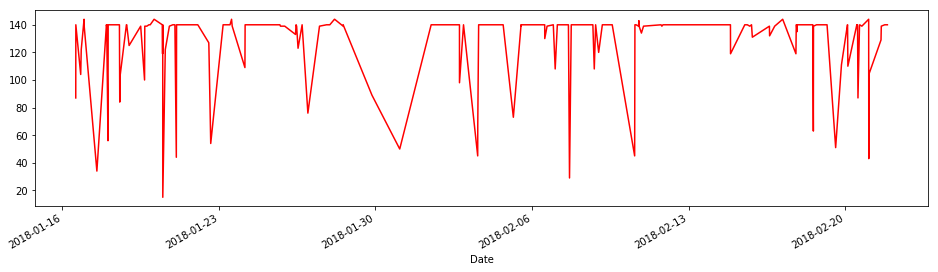

In [70]:
# Lenghts along time:
tlen.plot(figsize=(16,4), color='r');

And to plot the likes versus the retweets in the same chart:

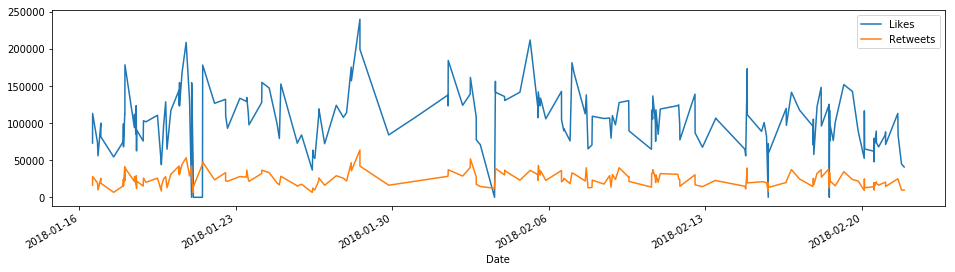

In [71]:
# Likes vs retweets visualization:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);

## 2.3. Pie charts of sources

We're almost done with this second section of the workshop. Now we will plot the sources in a pie chart, since we realized that not every tweet is tweeted from the same source (😱🤔). We first clean all the sources:

In [72]:
# We obtain all possible sources:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)
 
# We print sources list:
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))

Creation of content sources:
* Twitter for iPhone
* Media Studio
* Twitter for iPad


With the following output, we realize that basically this twitter account has two sources: Creation of content sources: Twitter for iPhone Media Studio

We now count the number of each source and create a pie chart. You'll notice that this code cell is not the most optimized one... Please have in mind that it was 4 in the morning when I was designing this workshop.

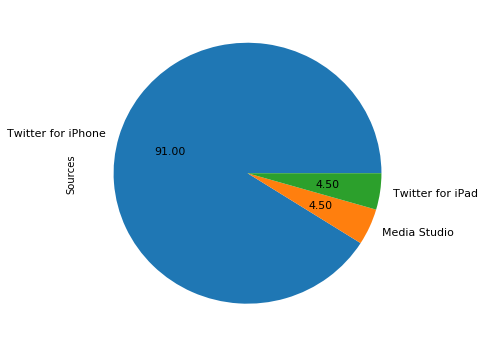

In [73]:
# We create a numpy vector mapped to labels:
percent = np.zeros(len(sources))
 
for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass
 
percent /= 100
 
# Pie chart:
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));

And we can see the percentage of tweets per source.

We can now proceed to do sentiment analysis.

# 3. Sentiment analysis

## 3.1. Importing textblob

As we mentioned at the beginning of this workshop, textblob will allow us to do sentiment analysis in a very simple way. We will also use the `re` library from Python, which is used to work with regular expressions. For this, I'll provide you two utility functions to: a) clean text (which means that any symbol distinct to an alphanumeric value will be remapped into a new one that satisfies this condition), and b) create a classifier to analyze the polarity of each tweet after cleaning the text in it. I won't explain the specific way in which the function that cleans works, since it would be extended and it might be better understood in the official `re` documentation: https://docs.python.org/3/library/re.html.

TextBlob stands on the giant shoulders of NLTK and pattern, and plays nicely with both.

In [74]:
from textblob import TextBlob
import re
 
def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())
 
def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

The way it works is that textblob already provides a trained analyzer (cool, right?). Textblob can work with different machine learning models used in natural language processing. If you want to train your own classifier (or at least check how it works) feel free to check the following link: https://textblob.readthedocs.io/en/dev/classifiers.html. It might result relevant since we're working with a pre-trained model (for which we don't know the data that was used).

Anyway, getting back to the code we will just add an extra column to our data. This column will contain the sentiment analysis and we can plot the dataframe to see the update:

In [75]:
# We create a column with the result of the analysis:
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])

# write the final data to csv
# data.to_csv('trump-tweets.csv', encoding='utf-8', index=False)

# We display the updated dataframe with the new column:
data.head(10)

,Tweets,len,ID,Date,Source,Likes,RTs,SA
0,.@FLOTUS Melania and I join millions of people...,140,966420452070559749,2018-02-21 21:12:45,Twitter for iPhone,40910,9725,0
1,"Yesterday, it was my great honor to recognize ...",140,966377081469882368,2018-02-21 18:20:25,Media Studio,45070,9833,1
2,Question: If all of the Russian meddling took ...,139,966321700588711936,2018-02-21 14:40:21,Twitter for iPhone,84157,24260,1
3,The GREAT Billy Graham is dead. There was nobo...,129,966317112565420033,2018-02-21 14:22:07,Twitter for iPhone,113267,24967,1
4,@CNN @MSNBC Whether we are Republican or Democ...,104,966119932793585664,2018-02-21 01:18:36,Twitter for iPhone,71367,14623,0
5,"So true, thank you! https://t.co/9TTXlfokYz",43,966118856874971138,2018-02-21 01:14:19,Twitter for iPhone,88297,20033,1
6,Bad ratings @CNN &amp; @MSNBC got scammed when...,144,966117265426001920,2018-02-21 01:08:00,Twitter for iPhone,84866,20497,-1
7,Main Street is BOOMING thanks to our incredibl...,139,966006815745040384,2018-02-20 17:49:07,Twitter for iPhone,68042,16447,1
8,....cameras running. Another False Accusation....,140,965971586913374208,2018-02-20 15:29:07,Twitter for iPhone,73635,18908,-1
9,"A woman I don’t know and, to the best of my kn...",139,965968309358333952,2018-02-20 15:16:06,Twitter for iPhone,89342,20787,1


As we can see, the last column contains the sentiment analysis (SA). We now just need to check the results.

## 3.2. Analyzing the results

To have a simple way to verify the results, we will count the number of neutral, positive and negative tweets and extract the percentages.

In [76]:
# We construct lists with classified tweets:
 
pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]

In [77]:
# We print percentages:
 
print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage of negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))

Percentage of positive tweets: 54.0%
Percentage of neutral tweets: 23.5%
Percentage of negative tweets: 22.5%


We have to consider that we're working only with the 200 most recent tweets from D. Trump (last updated: September 2nd.). For more accurate results we can consider more tweets. An interesting thing (an invitation to the readers) is to analyze the polarity of the tweets from different sources, it might be deterministic that by only considering the tweets from one source the polarity would result more positive/negative. Anyway, I hope this resulted interesting.

As we saw, we can extract, manipulate, visualize and analyze data in a very simple way with Python. I hope that this leaves some uncertainty in the reader, for further exploration using this tools.